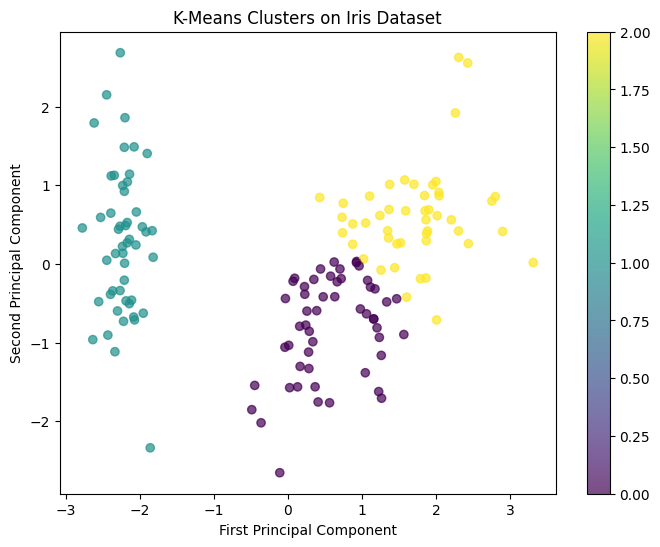

Cluster centers:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
intertia score (lower is better): -139.82049635974982
Silhouette score (higher is better): 0.45994823920518635


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means (try different n_clusters like 2-4)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clusters on Iris Dataset')
plt.colorbar(scatter)
plt.show()

# Compare with true labels
print("Cluster centers:\n", kmeans.cluster_centers_)
print("intertia score (lower is better):", kmeans.score(X_scaled))  # Use inertia; lower is tighter clusters

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette score (higher is better):", sil_score)